# <font color='blue'>Video Game Sales Prediction 1980 - 2020</font>

## Table of Contents
4. [Bivariate Analysis](#d_ID)
    
    4.1 [Box Plots](#d1_ID)
    
    4.2 [Pairplot](#d2_ID)
    
    4.3 [Spearman Correlation Matrix](#d3_ID)
    
    4.4 [Spearman Correlation Heatmap](#d4_ID)
    
    4.5 [Clustermap](#d5_ID)

## <a id="d_ID"> 4. Bivariate Analysis</a>

### <a id="d1_ID"> 4.1 Box Plots</a>

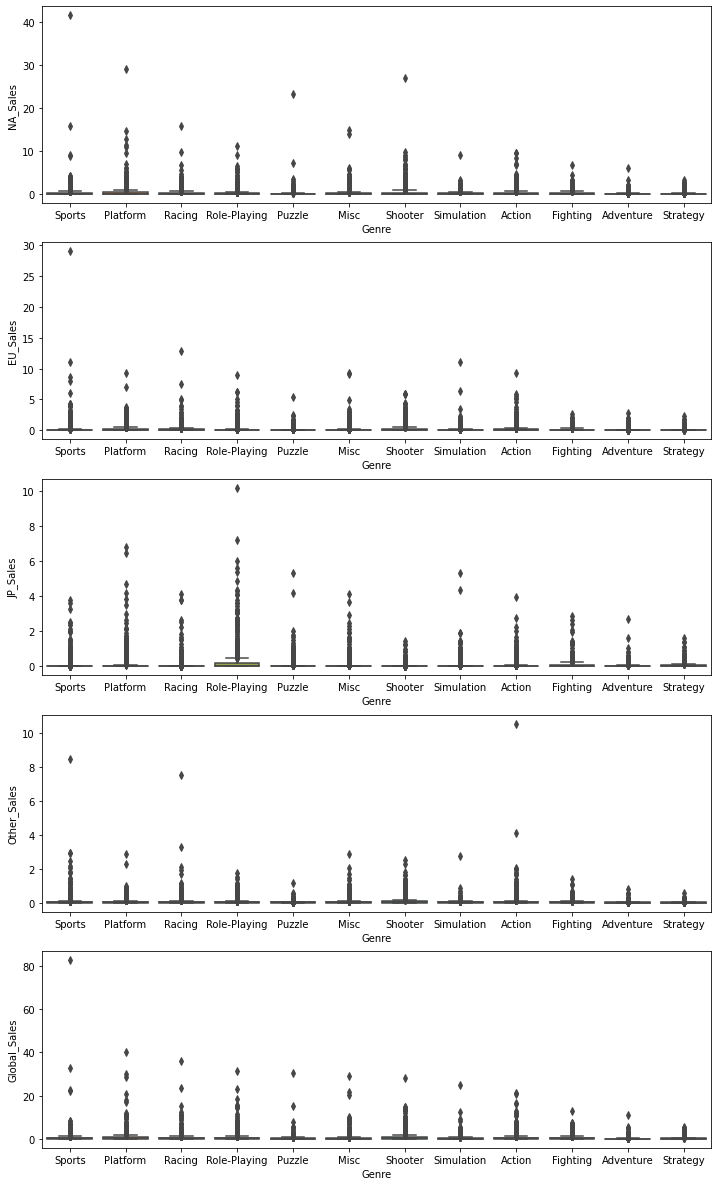

In [56]:
# Box plots for all numeric features by Genre
fig = plt.figure(figsize=(12,21))

ax1 = plt.subplot(5, 1, 1)
sns.boxplot(data=vgsales, x="Genre", y="NA_Sales", ax=ax1)

ax2 = plt.subplot(5, 1, 2)
sns.boxplot(data=vgsales, x="Genre", y="EU_Sales", ax=ax2)

ax3 = plt.subplot(5, 1, 3)
sns.boxplot(data=vgsales, x="Genre", y="JP_Sales", ax=ax3)

ax4 = plt.subplot(5, 1, 4)
sns.boxplot(data=vgsales, x="Genre", y="Other_Sales", ax=ax4)

ax5 = plt.subplot(5, 1, 5)
sns.boxplot(data=vgsales, x="Genre", y="Global_Sales", ax=ax5)

plt.show()

The boxplots for each region tell different video game sales stories. For North American Sales, there tends to be higher sales in categories Sports, Platform, Shooter, and Puzzle. For European Sales, there tends to be higher sales in categories Sports, Racing, and Simulation. For Japanese Sales, there tends to be higher sales in categories Role-Playing, Platform, Puzzle, and Simulation. For Other Sales, there tends to be higher sales in categories Action, Sports, and Racing.

### <a id="d2_ID">4.2 Pairplot</a>

Pairplots display the pairwise relationships between the numerical data (scatterplots) and diagonally display univariate distributions (histograms). Pairplots tell us whether two numerical attributes are correlated to each other visually.

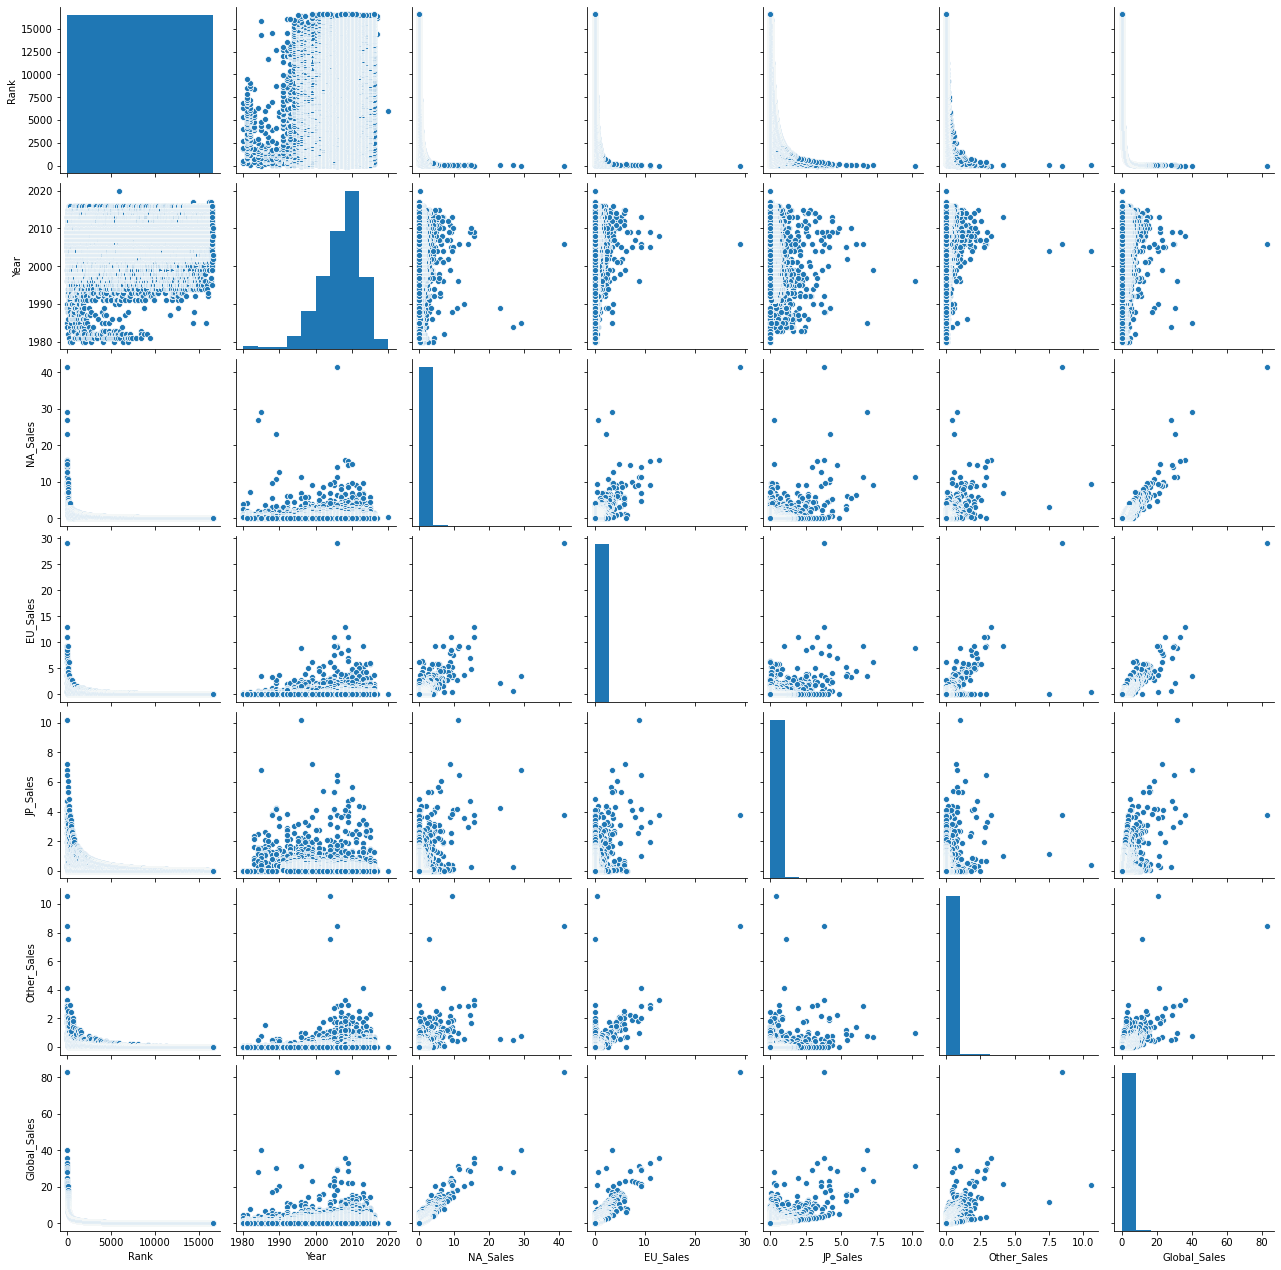

In [57]:
# Pairplots showing scatterplots between numeric features and histograms of numeric features on the diagonal axis
sns.pairplot(vgsales)
plt.show()

From the scatterplots, we can see these numeric variables have different correlations ranging from no correlation and slight to moderate positive correlation. We will need to look at the Spearman correlations used for non-parametric tests next to understand the correlations further.

### <a id="d3_ID">4.3 Spearman Correlation Matrix</a>

The Spearman correlation matrix tells us quantatively which numeric features are correlated with each other.

In [58]:
# Spearman correlation matrix
vgsales.corr(method="spearman")

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,-0.795516,-0.697105,-0.151851,-0.810416,-0.999622
NA_Sales,-0.795516,1.000000,0.681254,-0.228603,0.769432,0.795572
EU_Sales,-0.697105,0.681254,1.000000,-0.177486,0.766054,0.696846
JP_Sales,-0.151851,-0.228603,-0.177486,1.000000,-0.069990,0.151931
Other_Sales,-0.810416,0.769432,0.766054,-0.069990,1.000000,0.810381
Global_Sales,-0.999622,0.795572,0.696846,0.151931,0.810381,1.000000


### <a id="d4_ID">4.4 Spearman Correlation Heatmap</a>

A heatmap describes corrlations between numeric features by colour and its intensity.

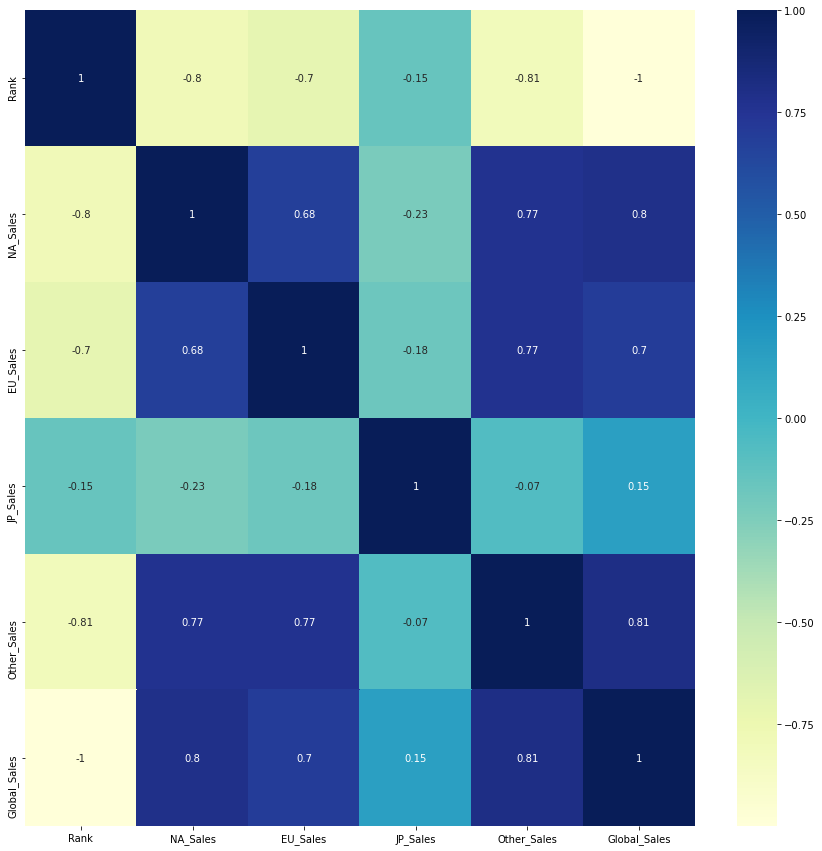

In [60]:
# Spearman correlation heatmap
plt.figure(figsize=(15,15))
sns.heatmap(vgsales.corr(method = 'spearman'), annot=True, cmap = "YlGnBu")
plt.show()

### <a id="d5_ID">4.5 Clustermap</a>

A clustermap describes corrlations between numeric features by colour and dendrogram.

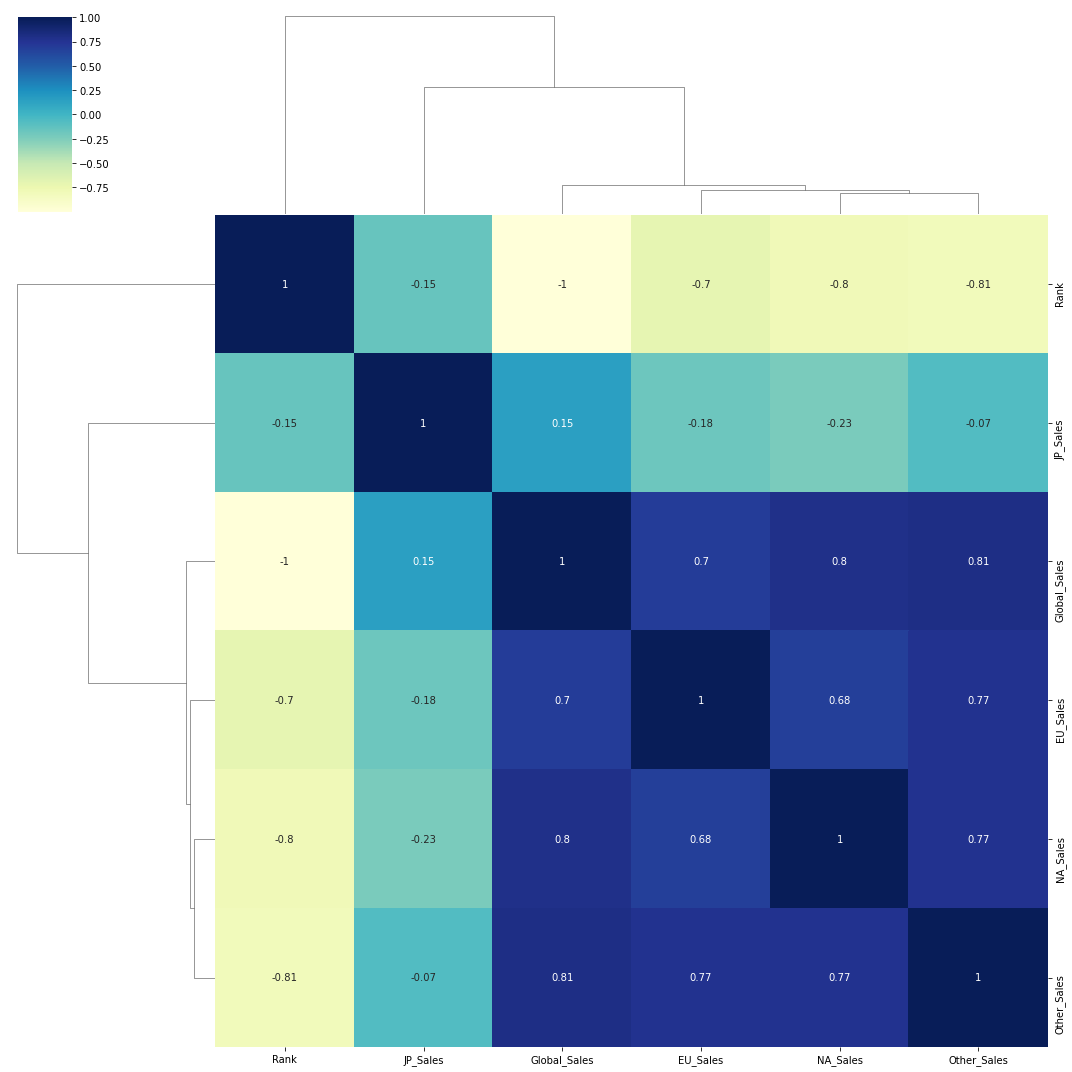

In [61]:
# Clustermap
sns.clustermap(vgsales.corr(method="spearman"), cmap='YlGnBu', annot=True, figsize=(15, 15))
plt.show()

In [319]:
# Import scipy library
import scipy.stats

In [320]:
# Highest positive correlation from heatmap and clustermap
print(scipy.stats.spearmanr(vgsales['Other_Sales'], vgsales['Global_Sales']))
print(scipy.stats.spearmanr(vgsales['NA_Sales'], vgsales['Global_Sales']))

SpearmanrResult(correlation=0.8103811037760874, pvalue=0.0)
SpearmanrResult(correlation=0.7955717409735806, pvalue=0.0)


In [322]:
# Highest negative correlation from heatmap and clustermap
print(scipy.stats.spearmanr(vgsales['Global_Sales'], vgsales['Rank']))
print(scipy.stats.spearmanr(vgsales['Other_Sales'], vgsales['Rank']))
print(scipy.stats.spearmanr(vgsales['NA_Sales'], vgsales['Rank']))

SpearmanrResult(correlation=-0.9996221280092139, pvalue=0.0)
SpearmanrResult(correlation=-0.8104159058777273, pvalue=0.0)
SpearmanrResult(correlation=-0.7955158967845058, pvalue=0.0)


The highest positive correlations in our data is 0.81 between Other Sales and Global Sales (strong positive correlation) and 0.80 between North American Sales and Global Sales (strong positive correlation). The highest negative correlations is -1.00 between Global Sales and Rank (strong negative correlation), -0.81 between Other Sales and Rank (strong negative correlation), and -0.80 between North American Sales and Rank (strong negative correlation). All are highly statistically significant with a p-value of 0.0. Since Rank and Global Sales are strongly correlated (-1.00), Global Sales will be dropped later on from our dataset for the analysis.